In [2]:
import numpy as np
N = 2 
d = 2 
C = 3

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N, ))


In [3]:
from scipy import sparse

def convert_labels(y, C = C):
    
    Y = sparse.coo_matrix((np.ones_like(y), 
                           (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

Y = convert_labels(y, C)
print(y)
print('------------')
print(Y)

[2 0]
------------
[[0 1]
 [0 0]
 [1 0]]


In [4]:
def cost(W, X, Y):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis=0)
    return A

# We should only check with small data 
def grad(W, X, Y):
    A = softmax(W.T.dot(X))
    E = A - Y
    return X.dot(E.T)

def numerical_gradient(W):
    eps = 1e-6
    g = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] = W_p[i, j] + eps
            W_n[i, j] = W_n[i, j] - eps
            g[i, j] = (cost(W_p, X, Y) - cost(W_n, X, Y))/(2*eps)
    
    return g

W_init = np.random.randn(d, C)

g1 = grad(W_init, X, Y)
g2 = numerical_gradient(W_init)

print(np.linalg.norm(g1-g2))


3.825997926682201e-10


In [5]:
def softmax_regression(W_init, X, y, eta, tol=1e-4, max_count=10000):
    W = [W_init]
    count = 0
    check_after = 20
    Y = convert_labels(y, C)
    N = X.shape[1]
    d = X.shape[0]
    
    while count<max_count:
        rd_id = np.random.permutation(N)
        for i in rd_id:
            count+=1 
#             print(X[:, i], d)
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(W[-1].T.dot(xi))
            W_new = W[-1] + eta*xi.dot((yi-ai).T)
            W.append(W_new)
            if count%check_after == 0:
#                 print(count, check_after)
                if np.linalg.norm(W[-1] - W[-check_after]) < tol:
                    return W
    
    return W

eta = .05
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(W_init, X, y, eta)

print(W[-1])

[[-3.79820755 -0.2186487   3.73601648]
 [-3.26943011  1.82769295  3.27040497]]


In [6]:
def softmax_stable(Z):
    c = np.max(Z, axis=0, keepdims=True)
    e_Z = np.exp(Z-c)
    A = e_Z/e_Z.sum(axis=0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

print(pred(W[-1], X))

[2 0]


In [9]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0).T
# print(X)
X = np.concatenate((np.ones((1, 3*N)), X), axis=0)

C = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

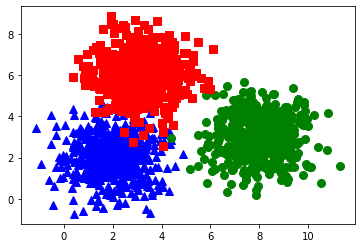

In [18]:
import matplotlib.pyplot as plt 
    
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=8)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=8)
plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=8)

plt.show()

In [19]:
W_init = np.random.randn(X.shape[0], C)

W = softmax_regression(W_init, X, original_label, eta)

print(W[-1])

[[ 8.40395706 -4.04130831 -3.68733244]
 [-0.72853521  2.05616443 -0.31572722]
 [-0.11544196 -0.14939111  2.69982196]]
